Accuracy: 0.6583333333333333
Precision: 0.7731958762886598
Recall: 0.7978723404255319
F1 Score: 0.7853403141361256
AUC: 0.5241407528641571


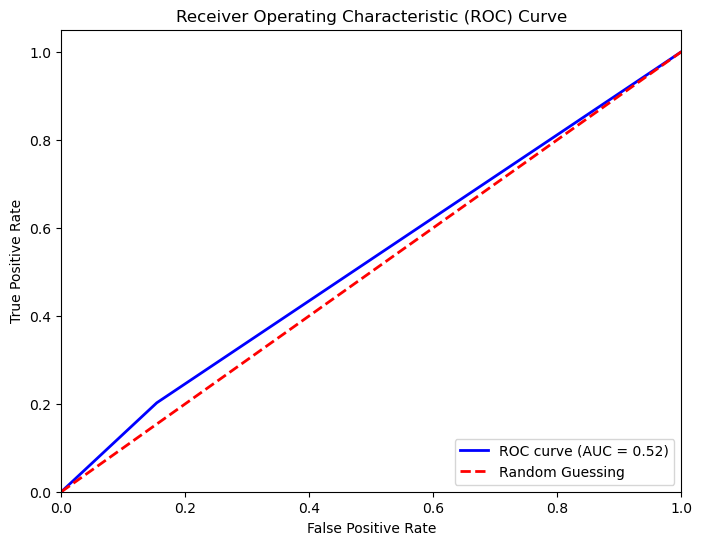

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Good')
recall = recall_score(y_test, y_pred, pos_label='Good')
f1 = f1_score(y_test, y_pred, pos_label='Good')

# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Good')
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


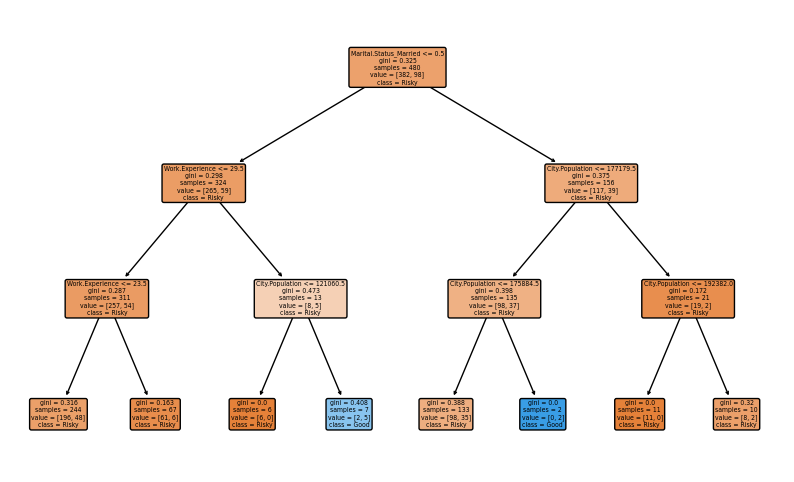

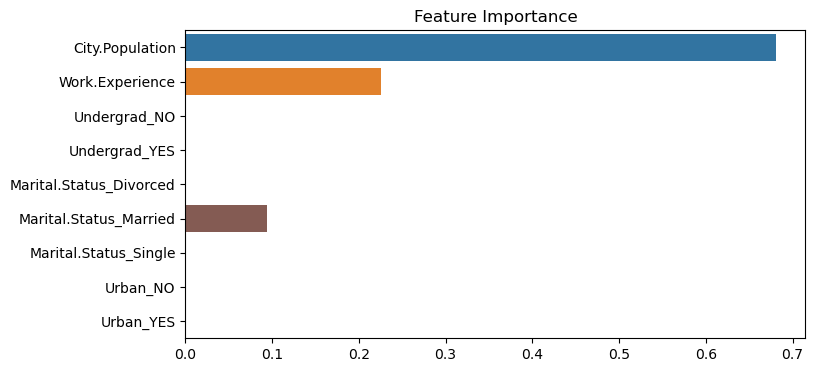

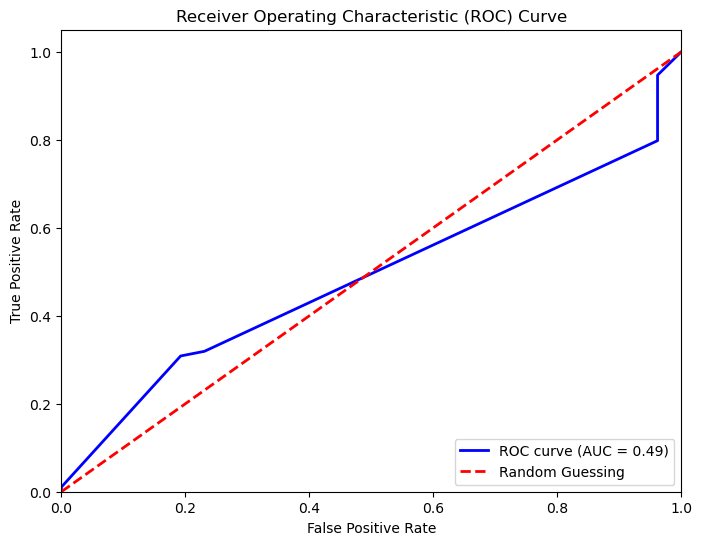

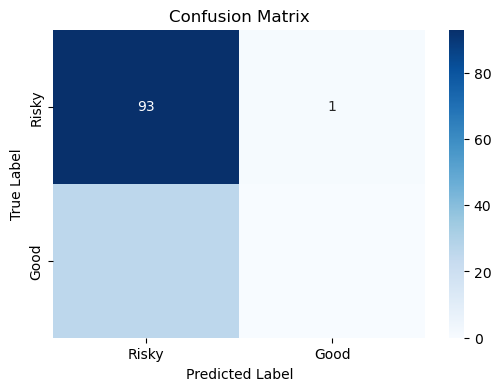

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import seaborn as sns

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting the max depth
clf.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(10,6))  # Adjusting the figsize
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'], rounded=True)
plt.show()

# Plot Feature Importance
plt.figure(figsize=(8,4))  # Adjusting the figsize
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Good')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



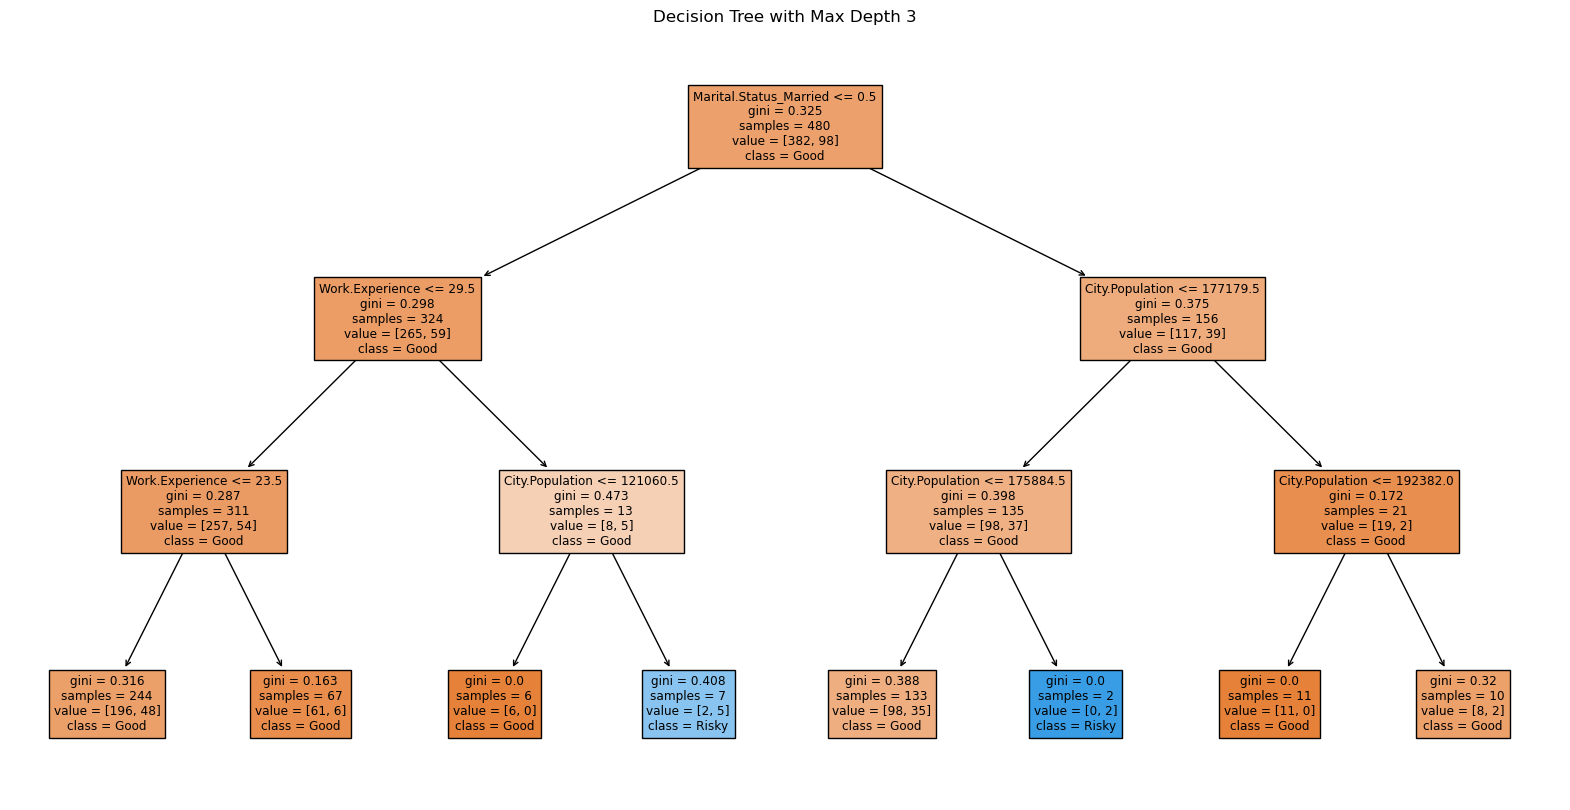

Metrics for Max Depth 3:
Accuracy: 0.775
Precision: 0.7815126050420168
Recall: 0.9893617021276596
F1 Score: 0.8732394366197184




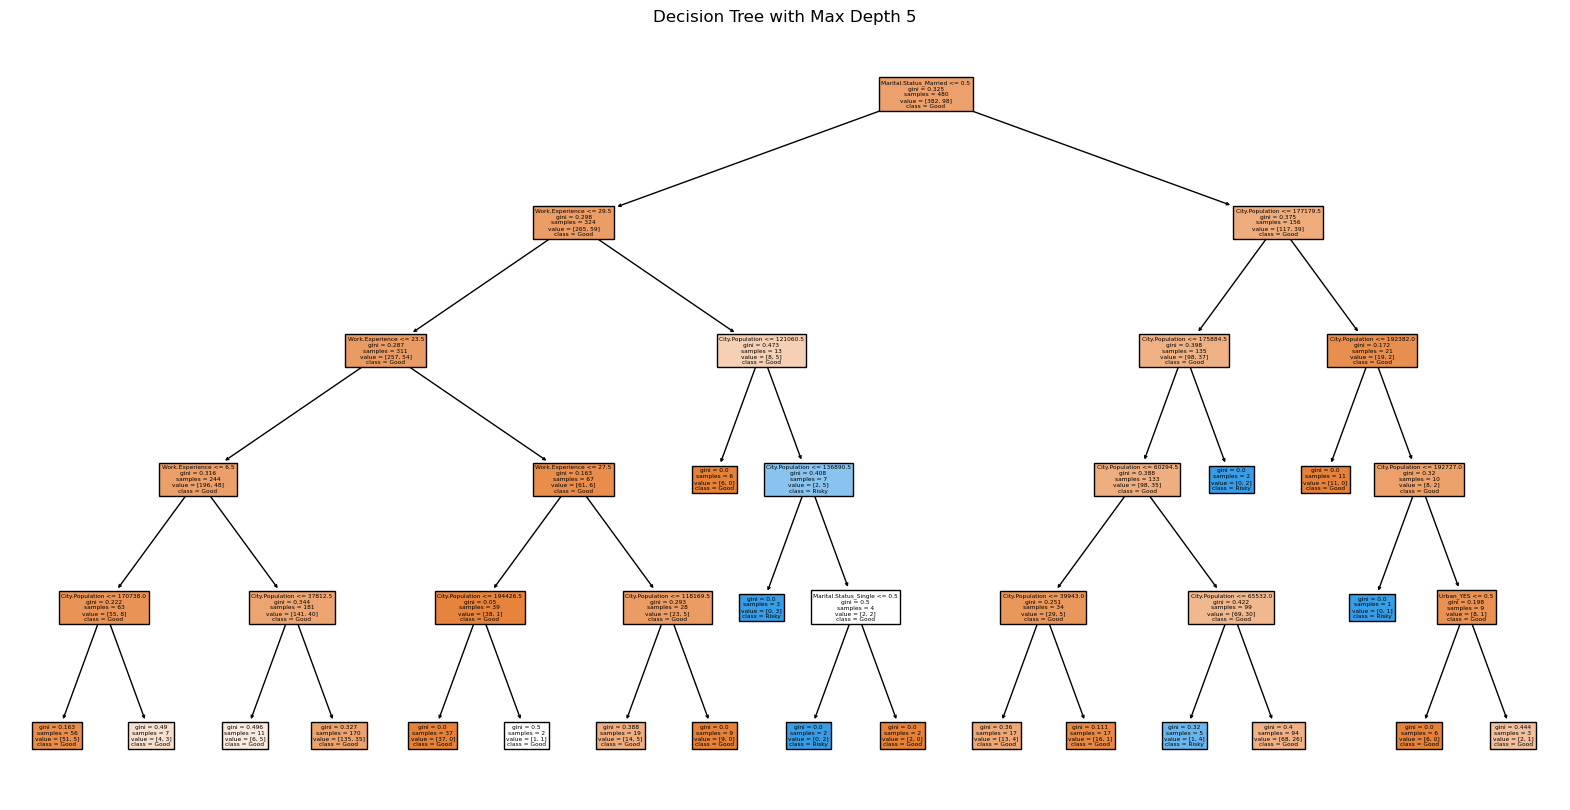

Metrics for Max Depth 5:
Accuracy: 0.775
Precision: 0.7815126050420168
Recall: 0.9893617021276596
F1 Score: 0.8732394366197184




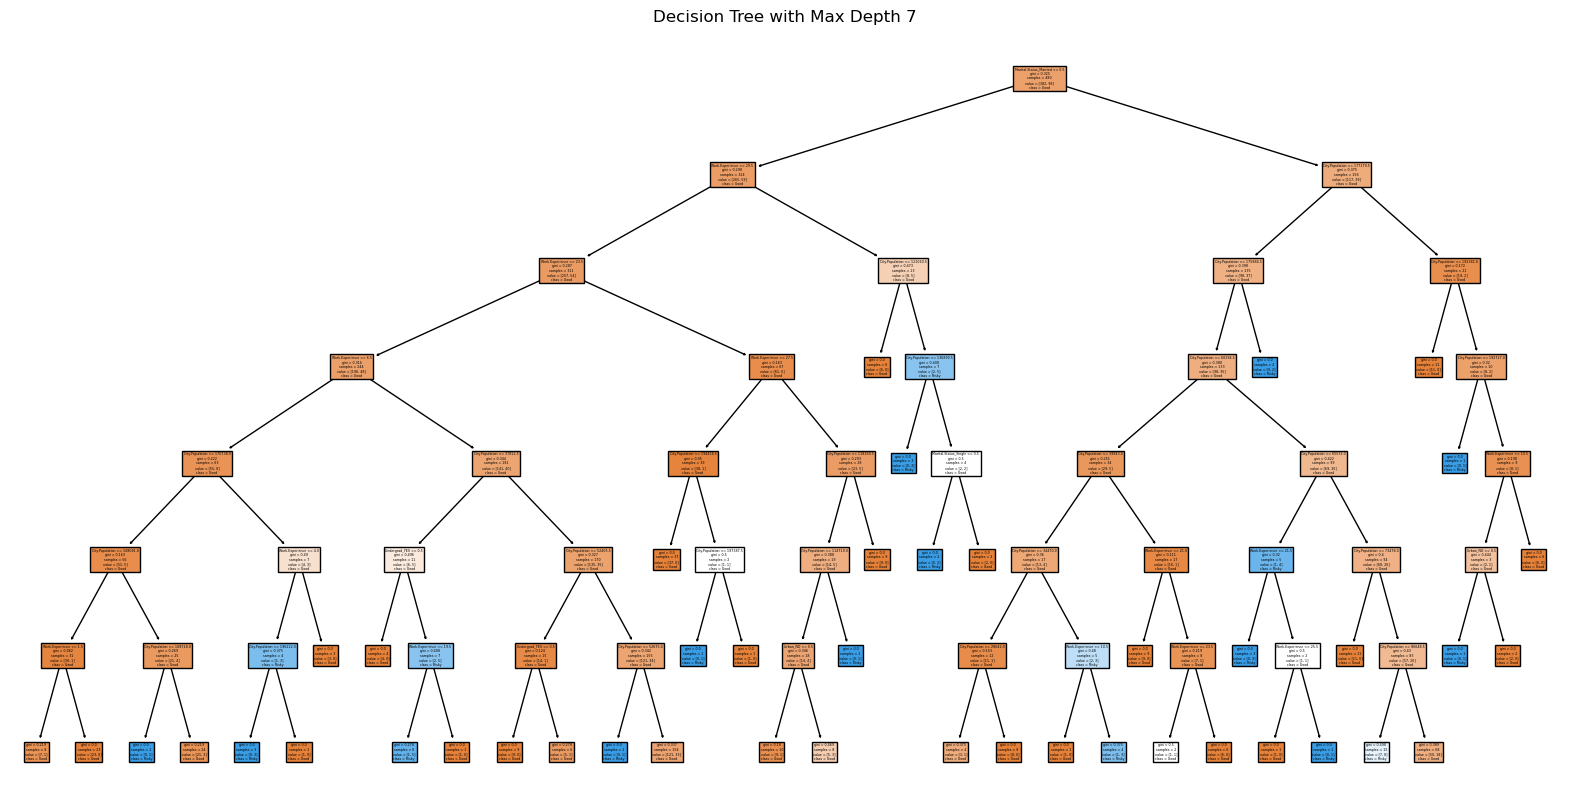

Metrics for Max Depth 7:
Accuracy: 0.7
Precision: 0.7636363636363637
Recall: 0.8936170212765957
F1 Score: 0.8235294117647058




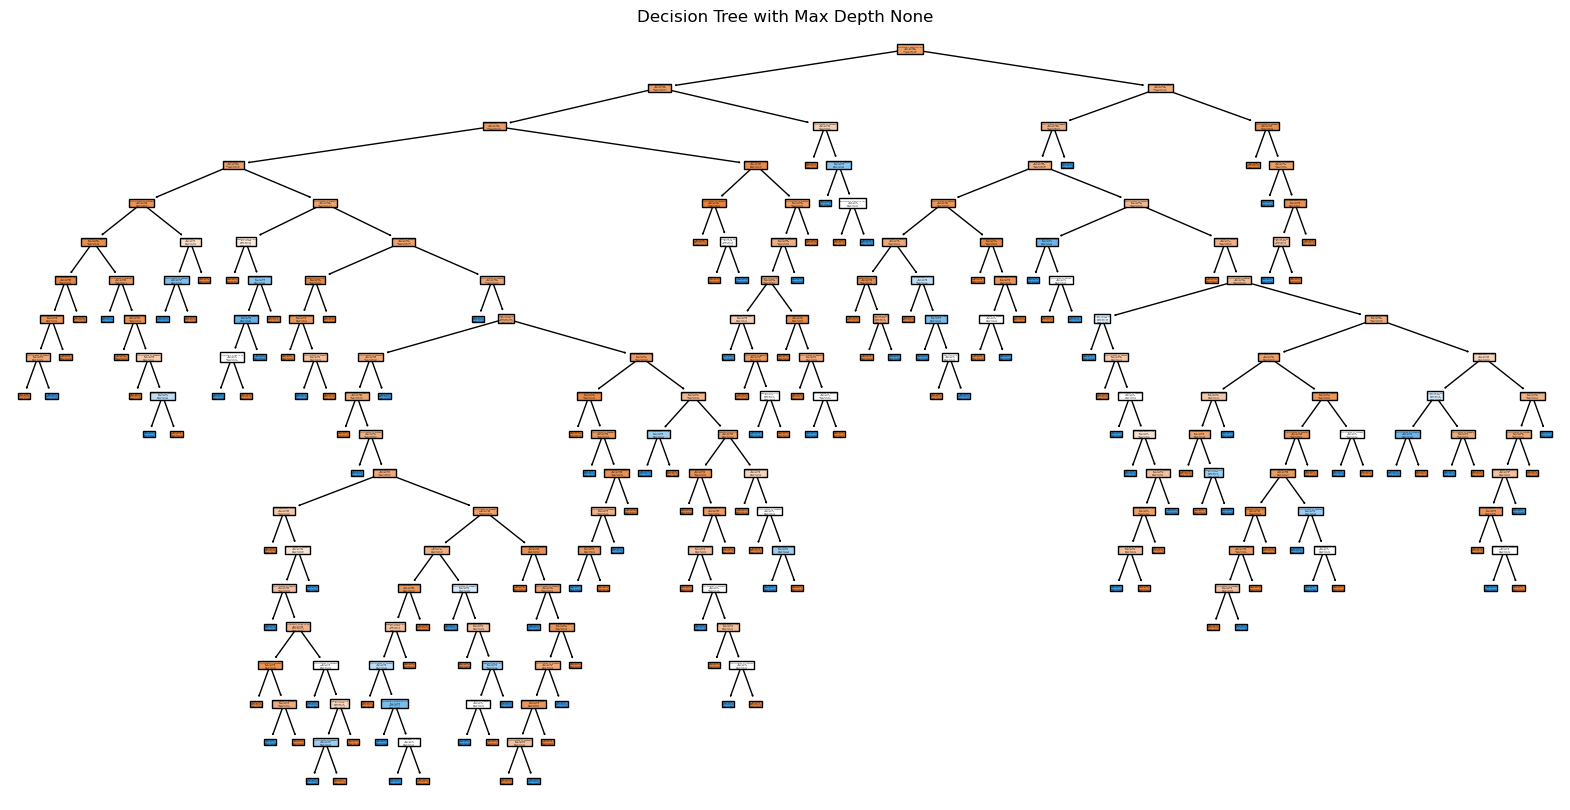

Metrics for Max Depth None:
Accuracy: 0.6583333333333333
Precision: 0.7731958762886598
Recall: 0.7978723404255319
F1 Score: 0.7853403141361256




In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = pd.cut(data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of max_depth values to try
max_depths = [3, 5, 7, None]

for max_depth in max_depths:
    # Train the decision tree classifier with specified max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
    plt.title(f'Decision Tree with Max Depth {max_depth if max_depth is not None else "None"}')
    plt.show()

    # Evaluate the decision tree classifier
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Good')
    recall = recall_score(y_test, y_pred, pos_label='Good')
    f1 = f1_score(y_test, y_pred, pos_label='Good')

    print(f"Metrics for Max Depth {max_depth if max_depth is not None else 'None'}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")


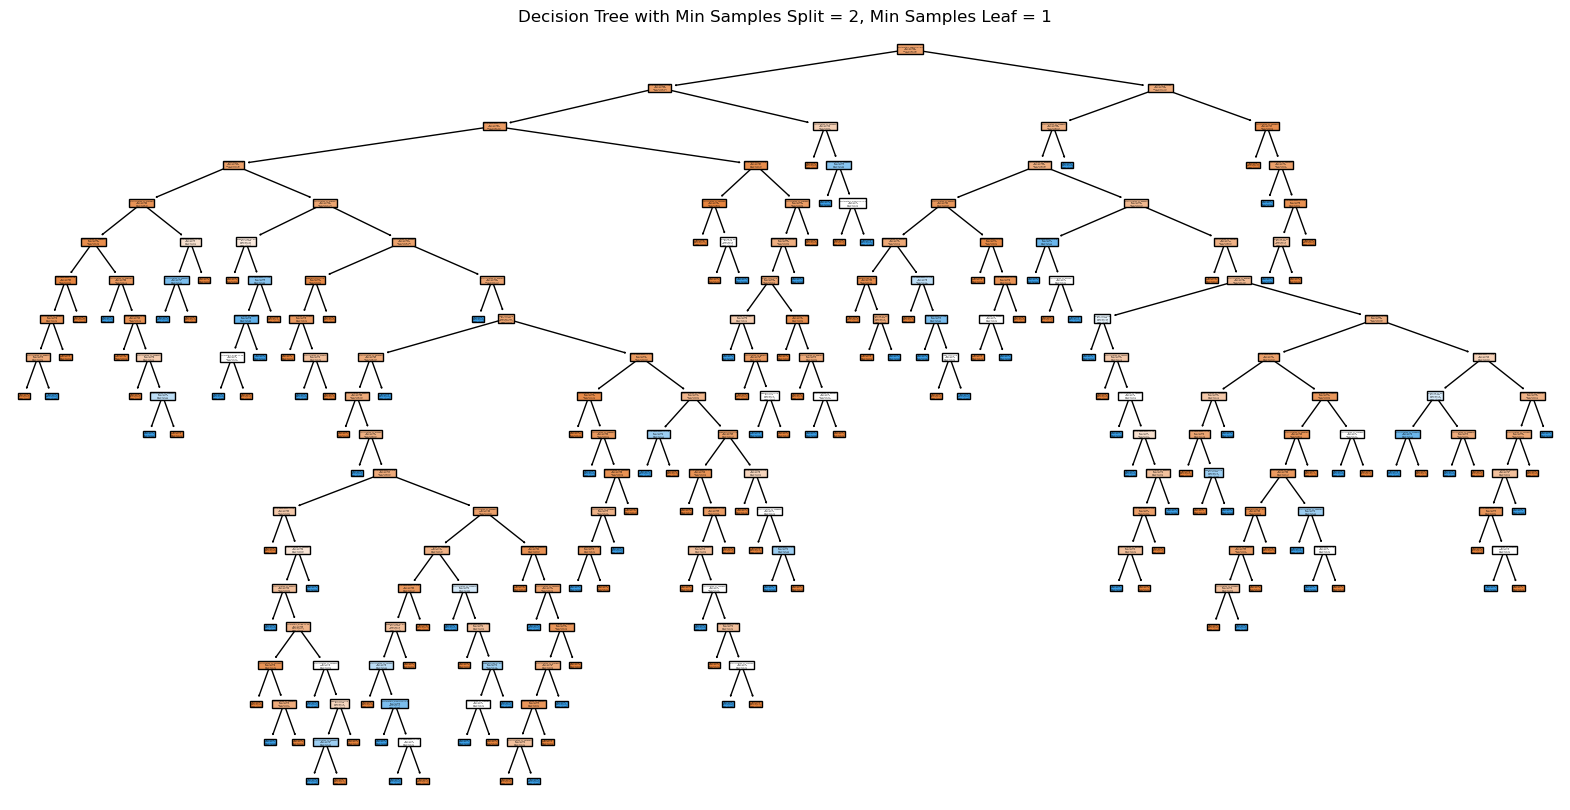

Metrics for Min Samples Split = 2, Min Samples Leaf = 1:
Accuracy: 0.6583333333333333
Precision: 0.7731958762886598
Recall: 0.7978723404255319
F1 Score: 0.7853403141361256




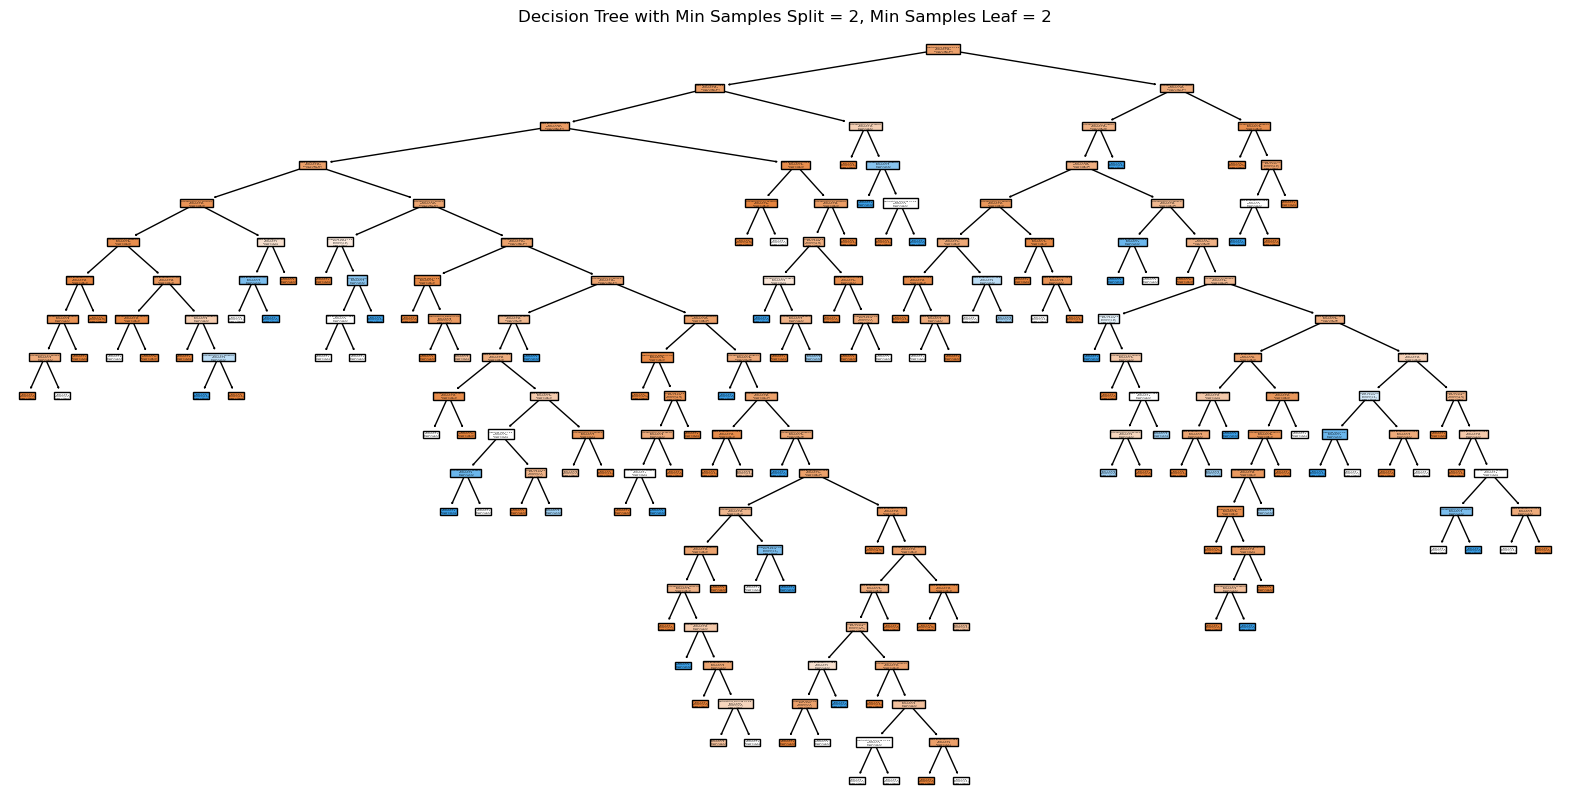

Metrics for Min Samples Split = 2, Min Samples Leaf = 2:
Accuracy: 0.6833333333333333
Precision: 0.7857142857142857
Recall: 0.8191489361702128
F1 Score: 0.8020833333333333




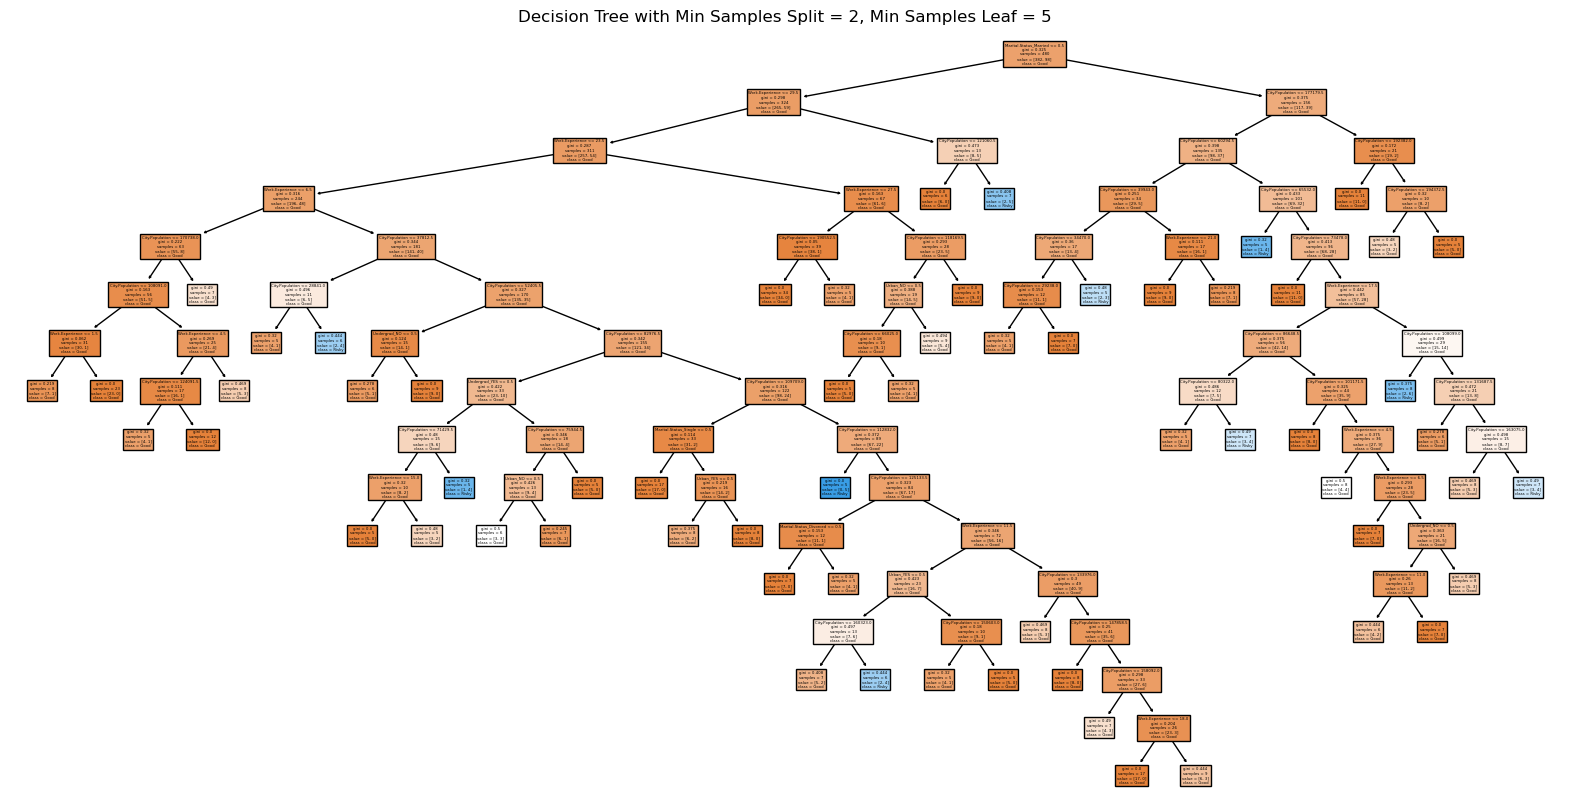

Metrics for Min Samples Split = 2, Min Samples Leaf = 5:
Accuracy: 0.675
Precision: 0.7777777777777778
Recall: 0.8191489361702128
F1 Score: 0.7979274611398963




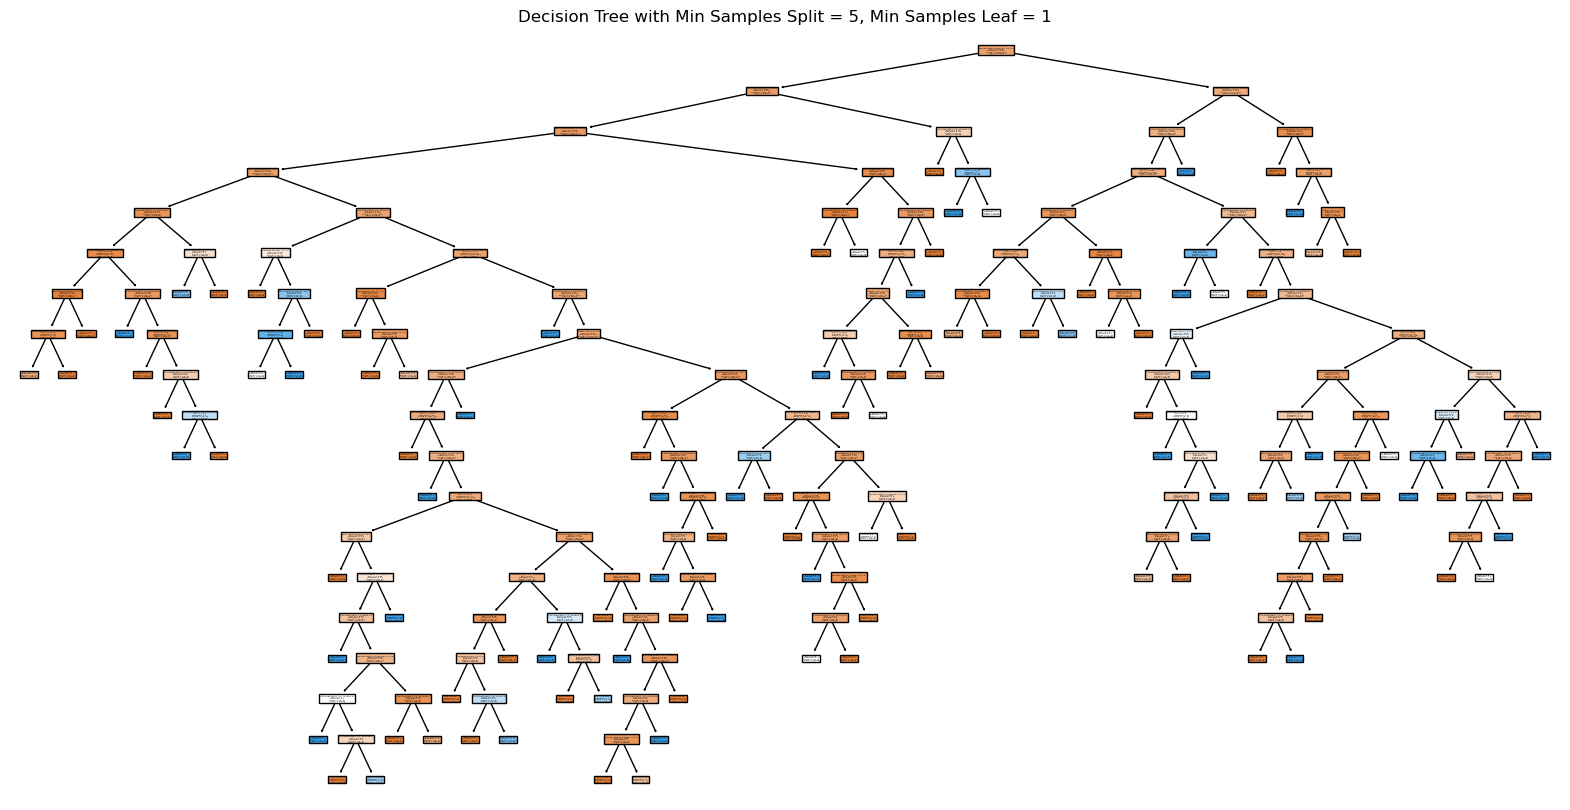

Metrics for Min Samples Split = 5, Min Samples Leaf = 1:
Accuracy: 0.6666666666666666
Precision: 0.78125
Recall: 0.7978723404255319
F1 Score: 0.7894736842105263




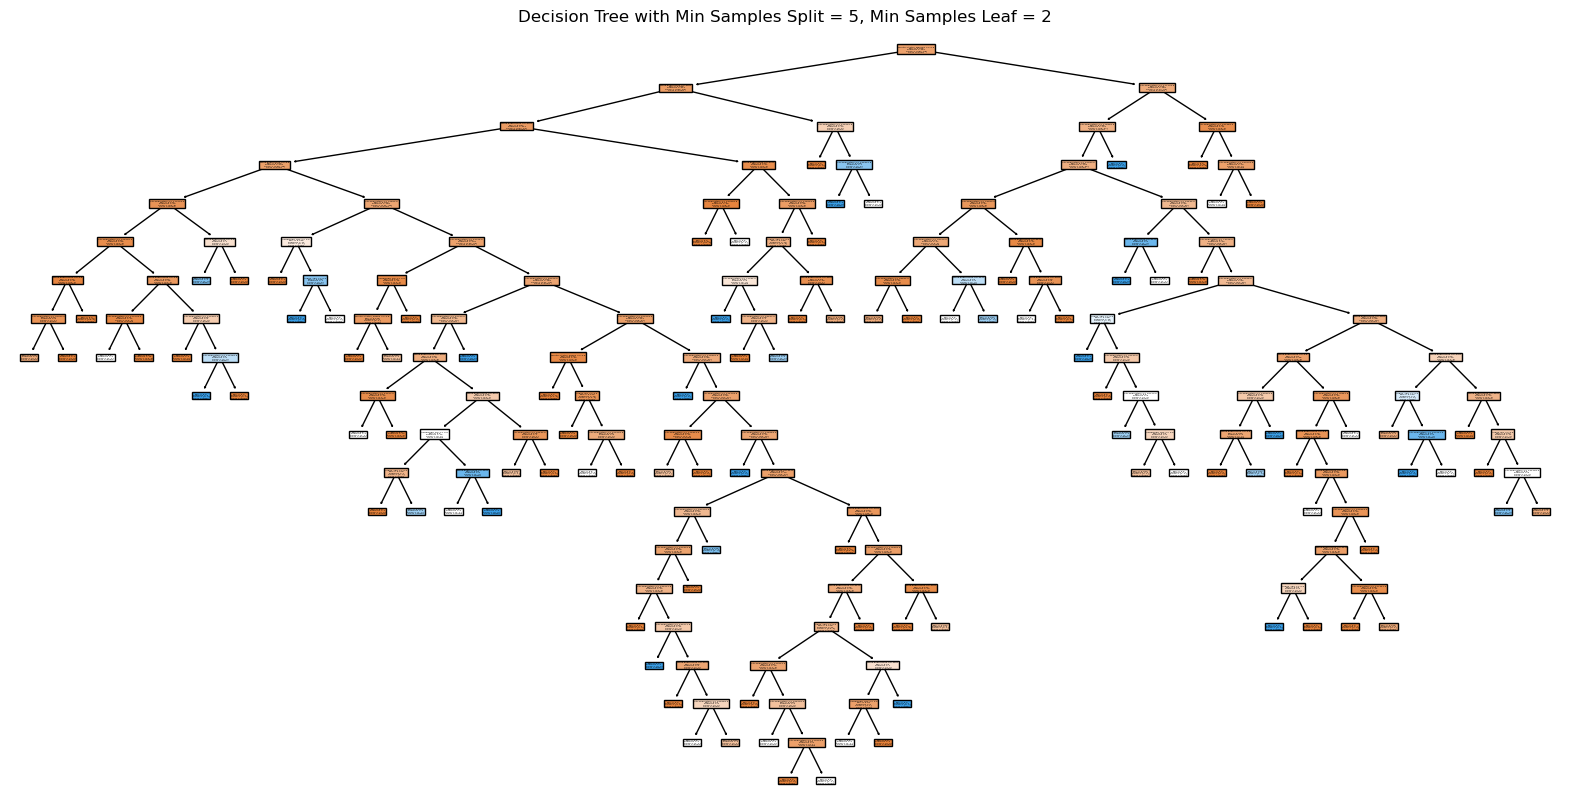

Metrics for Min Samples Split = 5, Min Samples Leaf = 2:
Accuracy: 0.6666666666666666
Precision: 0.78125
Recall: 0.7978723404255319
F1 Score: 0.7894736842105263




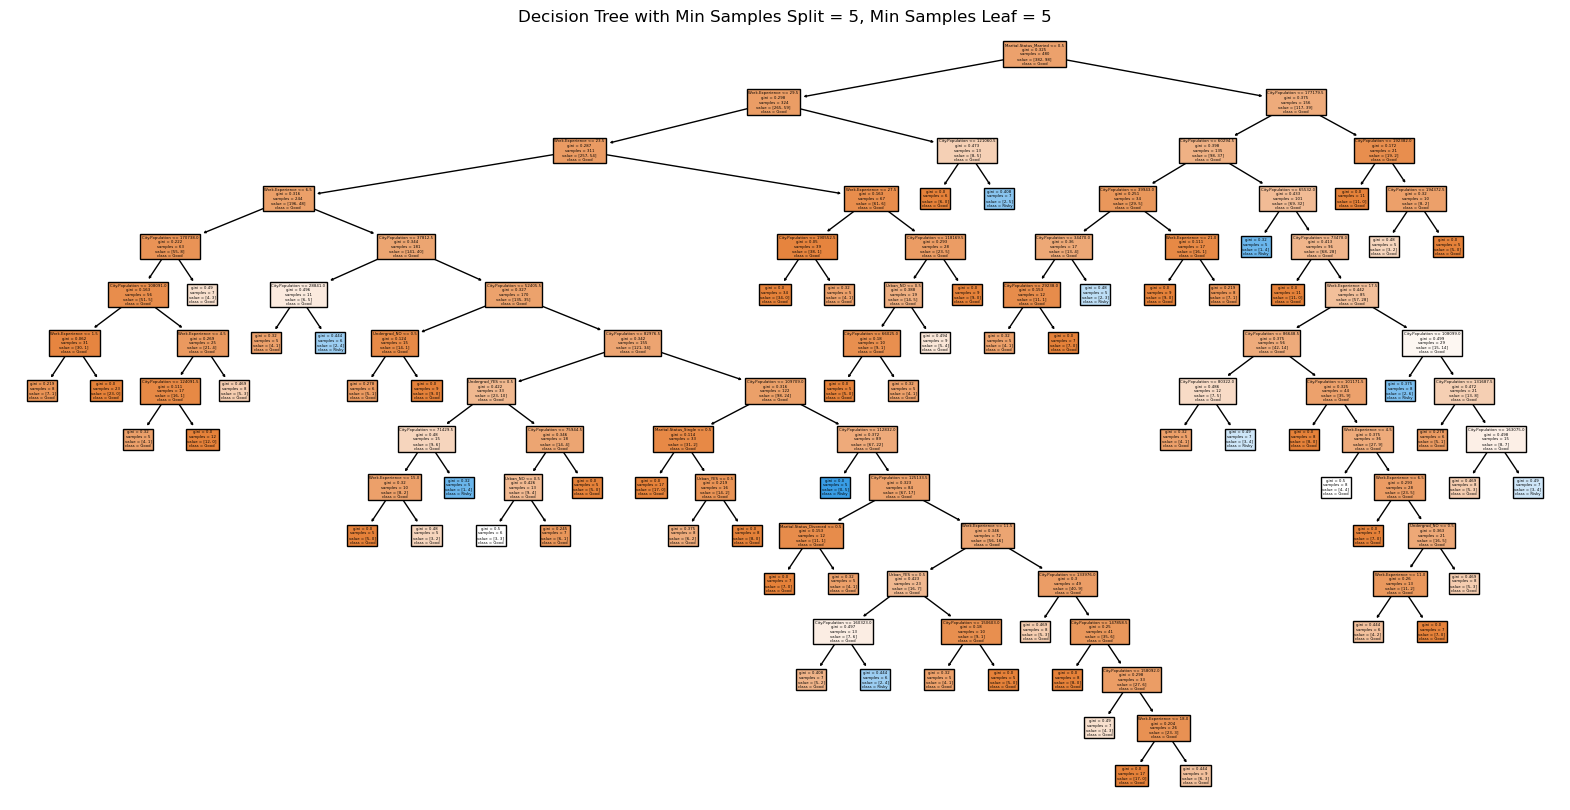

Metrics for Min Samples Split = 5, Min Samples Leaf = 5:
Accuracy: 0.675
Precision: 0.7777777777777778
Recall: 0.8191489361702128
F1 Score: 0.7979274611398963




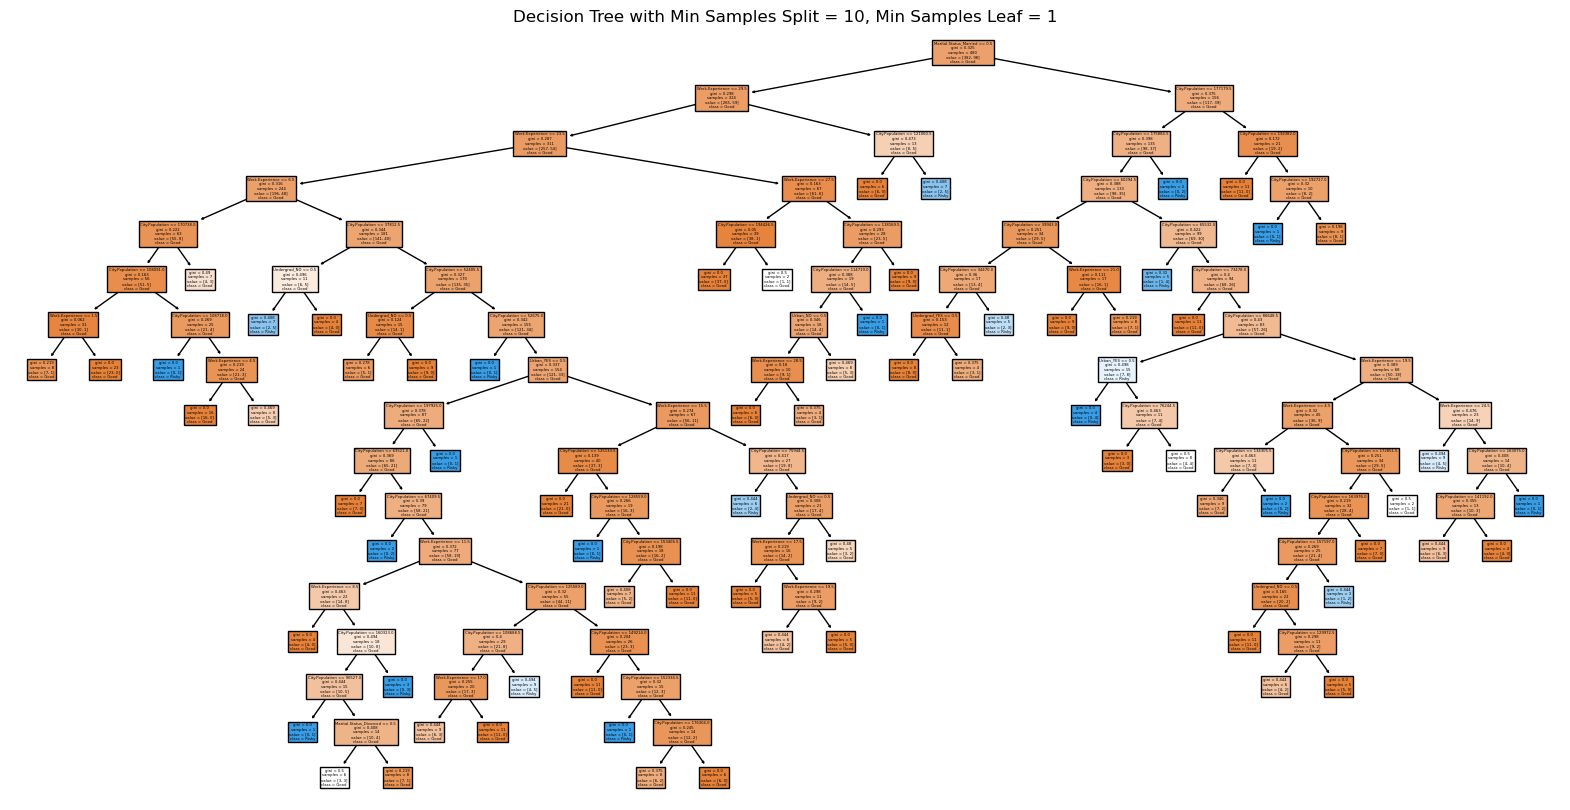

Metrics for Min Samples Split = 10, Min Samples Leaf = 1:
Accuracy: 0.6666666666666666
Precision: 0.77
Recall: 0.8191489361702128
F1 Score: 0.7938144329896908




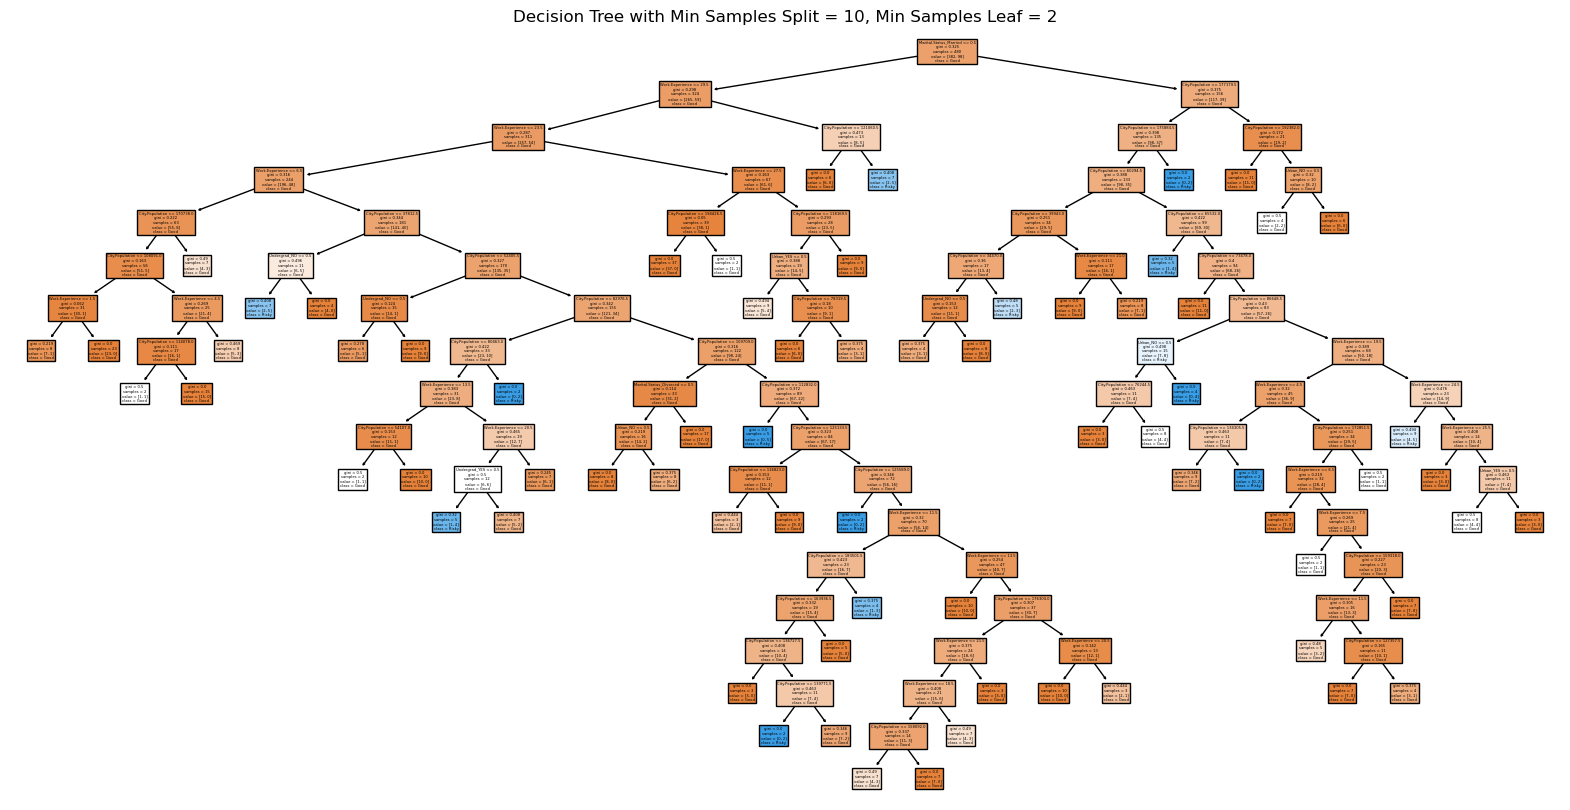

Metrics for Min Samples Split = 10, Min Samples Leaf = 2:
Accuracy: 0.6666666666666666
Precision: 0.77
Recall: 0.8191489361702128
F1 Score: 0.7938144329896908




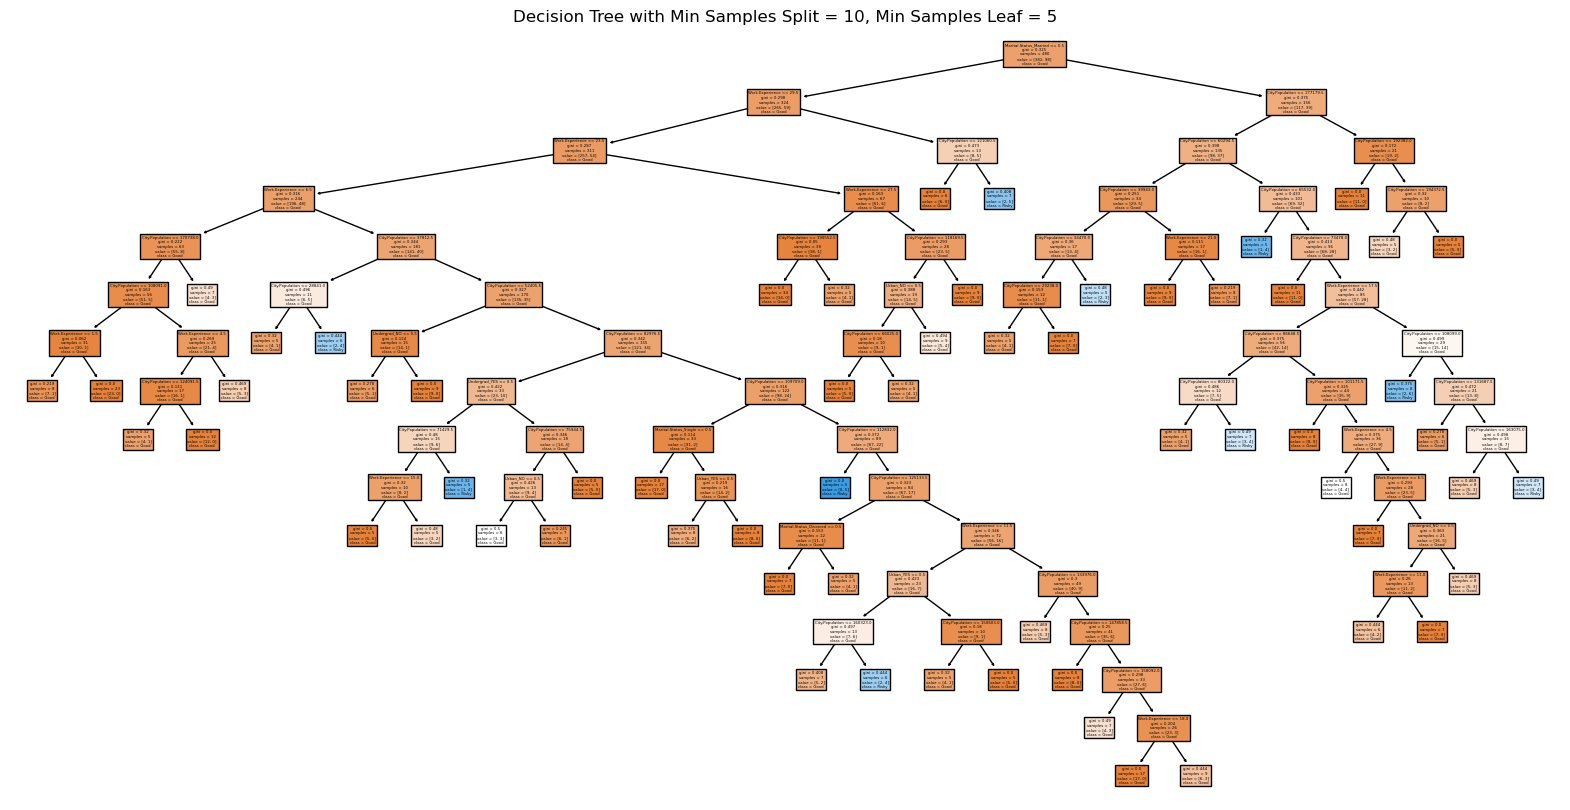

Metrics for Min Samples Split = 10, Min Samples Leaf = 5:
Accuracy: 0.675
Precision: 0.7777777777777778
Recall: 0.8191489361702128
F1 Score: 0.7979274611398963




In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = pd.cut(data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define min_samples_split and min_samples_leaf values to try
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 5]

for min_samples_split in min_samples_split_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Train the decision tree classifier with specified min_samples_split and min_samples_leaf
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        # Visualize the decision tree
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
        plt.title(f'Decision Tree with Min Samples Split = {min_samples_split}, Min Samples Leaf = {min_samples_leaf}')
        plt.show()

        # Evaluate the decision tree classifier
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='Good')
        recall = recall_score(y_test, y_pred, pos_label='Good')
        f1 = f1_score(y_test, y_pred, pos_label='Good')

        print(f"Metrics for Min Samples Split = {min_samples_split}, Min Samples Leaf = {min_samples_leaf}:")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("\n")


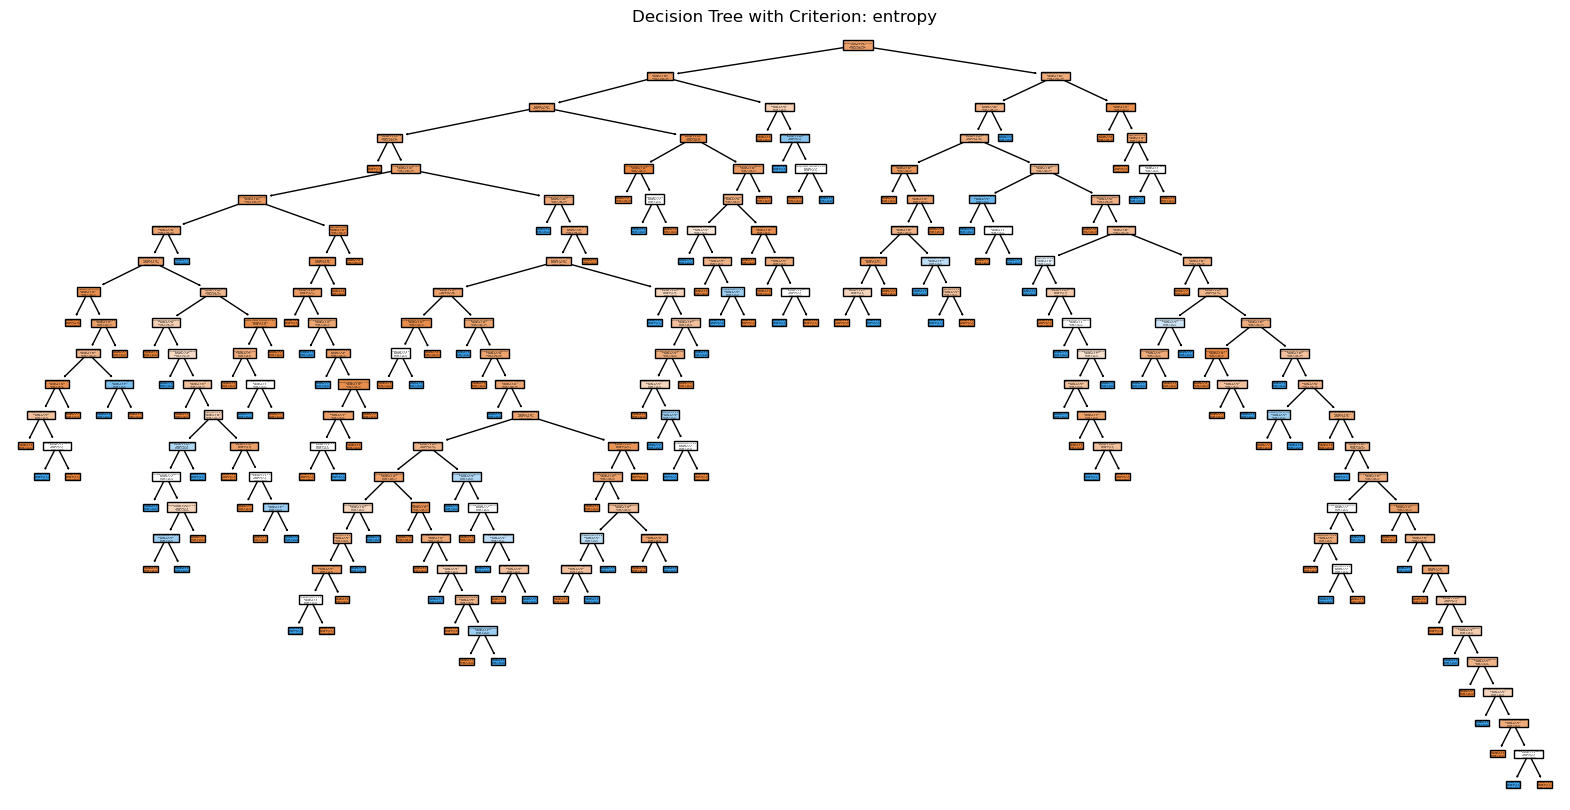

Metrics for Criterion: entropy:
Accuracy: 0.6666666666666666
Precision: 0.7872340425531915
Recall: 0.7872340425531915
F1 Score: 0.7872340425531915




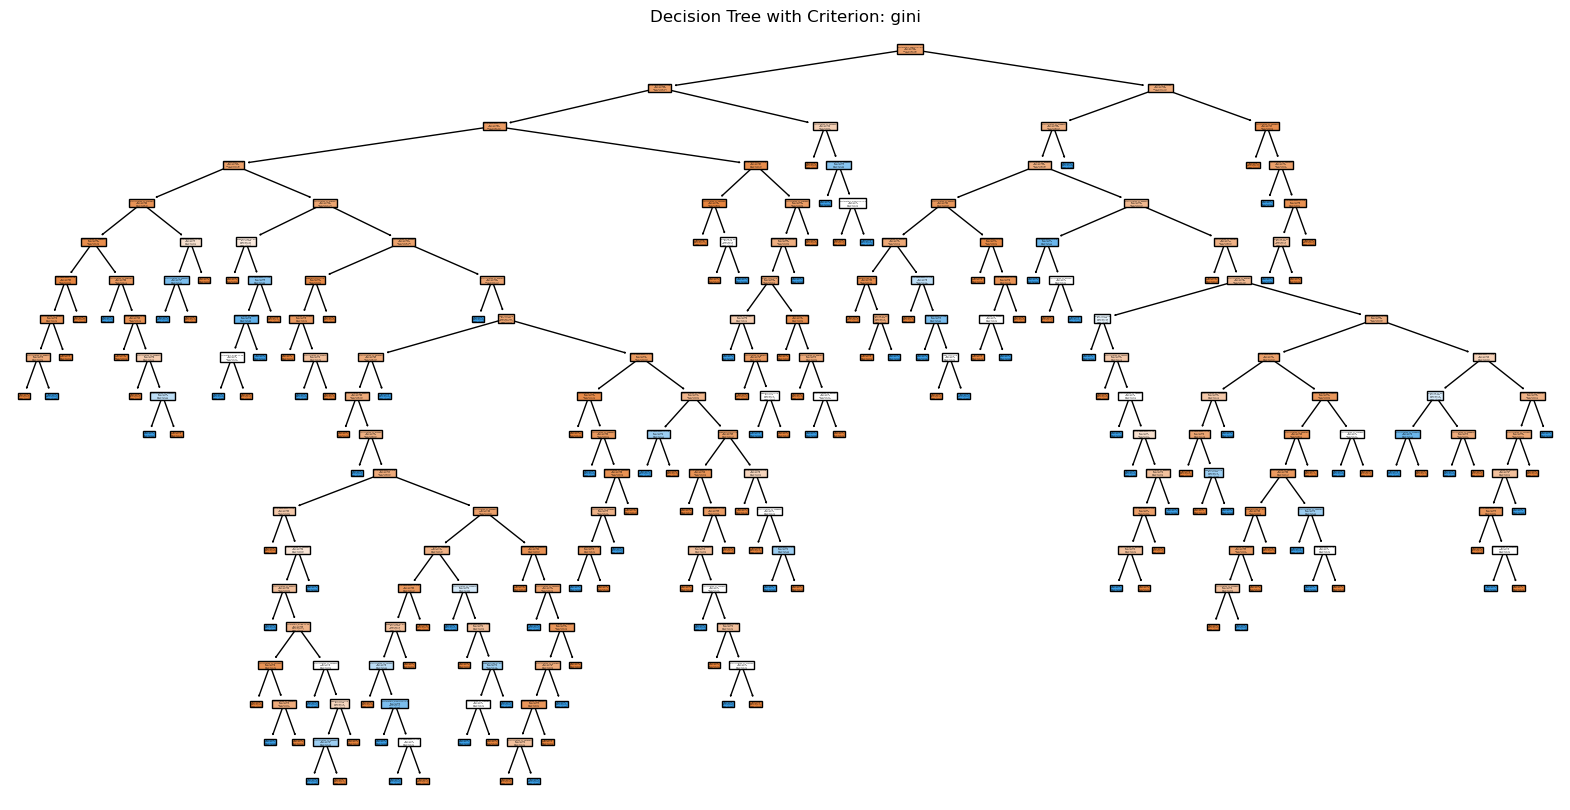

Metrics for Criterion: gini:
Accuracy: 0.6583333333333333
Precision: 0.7731958762886598
Recall: 0.7978723404255319
F1 Score: 0.7853403141361256




In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = pd.cut(data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define criteria to try
criteria = ['entropy', 'gini']

for criterion in criteria:
    # Train the decision tree classifier with specified criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
    plt.title(f'Decision Tree with Criterion: {criterion}')
    plt.show()

    # Evaluate the decision tree classifier
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Good')
    recall = recall_score(y_test, y_pred, pos_label='Good')
    f1 = f1_score(y_test, y_pred, pos_label='Good')

    print(f"Metrics for Criterion: {criterion}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")


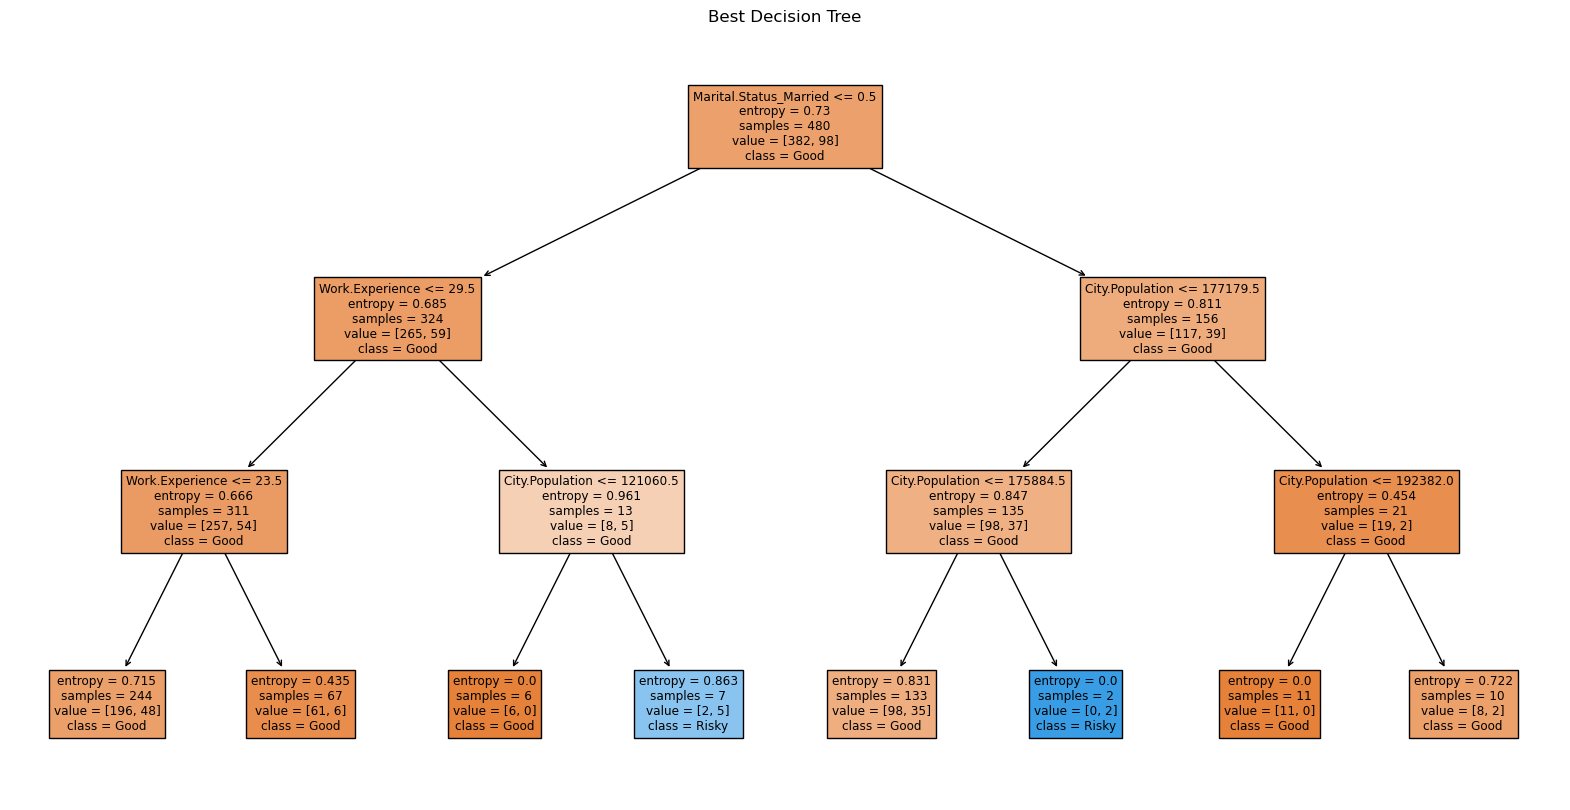

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}

Metrics for Best Estimator:
Accuracy: 0.775
Precision: 0.7815126050420168
Recall: 0.9893617021276596
F1 Score: 0.8732394366197184


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("Fraud_check.csv")

# Convert 'Taxable.Income' into a categorical variable
data['Income_Category'] = pd.cut(data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'])

# Define features and target variable
X = data_encoded.drop('Income_Category', axis=1)
y = data_encoded['Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Visualize the decision tree for the best estimator
plt.figure(figsize=(20, 10))
plot_tree(best_estimator, filled=True, feature_names=X.columns, class_names=best_estimator.classes_)
plt.title('Best Decision Tree')
plt.show()

# Evaluate the best estimator
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Good')
recall = recall_score(y_test, y_pred, pos_label='Good')
f1 = f1_score(y_test, y_pred, pos_label='Good')

print("Best Parameters:", best_params)
print("\nMetrics for Best Estimator:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
